In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
 data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
my_labels=data.species.unique().tolist()
my_labels

['setosa', 'versicolor', 'virginica']

In [8]:
data.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [9]:
values=data.species.value_counts().tolist()
values

[50, 50, 50]

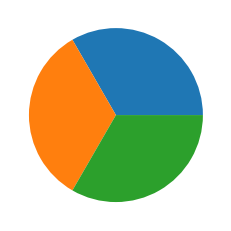

In [10]:
plt.pie(values)
plt.show()

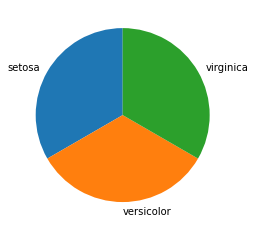

In [11]:
plt.pie(values,labels=my_labels,startangle=90)
plt.show()

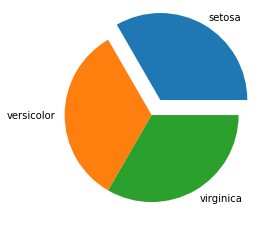

In [14]:
my_explode=[0.2,0,0]
plt.pie(values,labels=my_labels,explode=my_explode)
plt.show()

In [15]:
 x=data.iloc[:,:-1]
 y=data.iloc[:,-1]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
GNB=GaussianNB()

In [20]:
GNB.fit(x_train,y_train)

GaussianNB()

In [21]:
y_predict=GNB.predict(x_test)
y_predict

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa'], dtype='<U10')

In [22]:
from sklearn import svm 

In [32]:
classifier=svm.SVC(kernel='linear')

In [33]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
y_svm_predict=classifier.predict(x_test)
y_svm_predict   

array(['virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa'], dtype=object)

In [35]:
import sklearn.metrics as mc

In [36]:
dir(mc)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_aver

In [37]:
conf=mc.confusion_matrix(y_test,y_predict)
conf

array([[11,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 10]], dtype=int64)

In [38]:
report=mc.classification_report(y_test,y_svm_predict)
report

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        11\n  versicolor       1.00      0.75      0.86         8\n   virginica       0.85      1.00      0.92        11\n\n    accuracy                           0.93        30\n   macro avg       0.95      0.92      0.92        30\nweighted avg       0.94      0.93      0.93        30\n'

In [39]:
mc.accuracy_score(y_test,y_svm_predict)

0.9333333333333333